In [6]:
# Loading necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Loading my personal sleep data
df = pd.read_csv("/Users/saayedalam/Documents/Career/data_portfolio/sleep_cycle_analysis/data/raw/sleepcycle_raw.csv", sep=";")

In [9]:
# Finding the dimensions of the dataset.
df.shape

(1476, 25)

In [4]:
# An example of the dataset
df.head()

,Start,End,Sleep Quality,Regularity,Awake (seconds),Dream (seconds),Light (seconds),Deep (seconds),Mood,Heart rate (bpm),...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Snore time (seconds),Weather temperature (°F),Weather type,Notes,Body temperature deviation (degrees Celsius)
0,2015-10-08 02:45:57,2015-10-08 10:23:59,70%,0%,5404.8,0.0,22077.4,0.0,NaN,0,...,27482.2,22077.4,1465.7,2015-10-08 10:15:00,2015-10-08 10:45:00,0.0,32.0,No weather,NaN,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,61%,79%,2011.4,0.0,22125.7,0.0,NaN,0,...,24137.1,22125.7,482.7,2015-10-09 11:00:00,2015-10-09 11:30:00,0.0,32.0,No weather,NaN,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,77%,0%,5304.1,0.0,21666.0,0.0,NaN,0,...,26970.1,21666.0,539.4,2015-10-16 12:00:00,2015-10-16 12:30:00,0.0,32.0,No weather,NaN,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,84%,94%,1753.7,0.0,25935.9,0.0,NaN,0,...,27689.6,25935.9,553.8,2015-10-17 12:00:00,2015-10-17 12:30:00,0.0,32.0,No weather,NaN,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,77%,94%,1324.9,0.0,23517.4,0.0,NaN,0,...,24842.4,23517.4,496.8,2015-10-18 12:00:00,2015-10-18 12:30:00,0.0,32.0,No weather,NaN,NaN


In [5]:
# Create a summary of non-null counts and missing values count
summary = pd.DataFrame({
    'Non-Null Counts': df.notnull().sum(),
    'Missing Values': df.isnull().sum()
})

# Apply the highlighting for both columns
summary_styled = summary.style.apply(
    lambda x: ['background-color: yellow' if v > 0 else '' for v in x], 
    subset=['Missing Values']
).apply(
    lambda x: ['background-color: red' if v < 1476 else '' for v in x], 
    subset=['Non-Null Counts']
)

# Display the summary
display(summary_styled)

,Non-Null Counts,Missing Values
Start,1476,0
End,1476,0
Sleep Quality,1476,0
Regularity,1476,0
Awake (seconds),1476,0
Dream (seconds),1476,0
Light (seconds),1476,0
Deep (seconds),1476,0
Mood,543,933
Heart rate (bpm),1476,0


In [6]:
# Looks like the last column is empty, I will remove it
df.drop("Body temperature deviation (degrees Celsius)", axis=1, inplace=True)

In [7]:
# Convert both 'Start' and 'End' columns to datetime format in one line
df[['Start', 'End']] = df[['Start', 'End']].apply(pd.to_datetime)

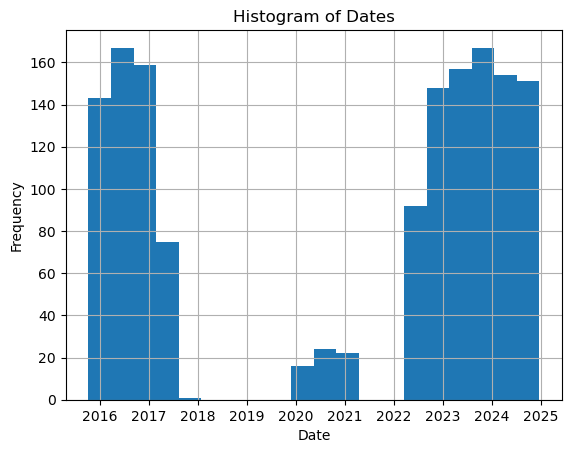

In [8]:
# Let us look at the Start and End variables.
df['Start'].hist(bins=20)
plt.title('Histogram of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

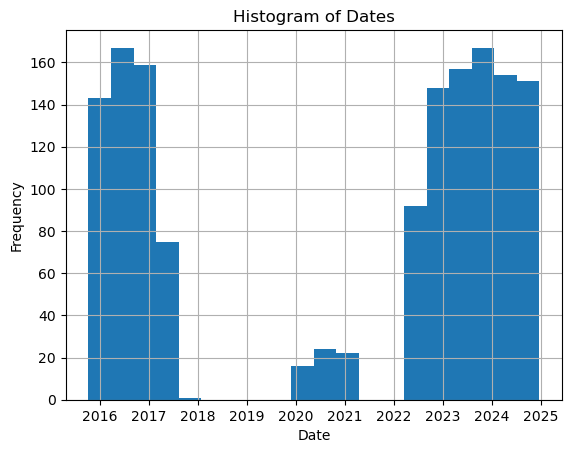

In [9]:
df['End'].hist(bins=20)
plt.title('Histogram of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Sleep Quality and Regularity are in percentage. Let us convert them. 
df[['Sleep Quality', 'Regularity']] = df[['Sleep Quality', 'Regularity']].apply(lambda x: pd.to_numeric(x.replace('%', '', regex=True), errors='coerce') / 100)

In [11]:
# Let us visualize and see how the variables look
display(df[['Sleep Quality', 'Regularity']].describe())

,Sleep Quality,Regularity
count,1476.000000,1476.000000
mean,0.797676,0.703598
std,0.158686,0.315930
min,0.030000,-1.090000
25%,0.720000,0.710000
50%,0.820000,0.800000
75%,0.910000,0.860000
max,1.000000,0.980000


<Axes: ylabel='Frequency'>

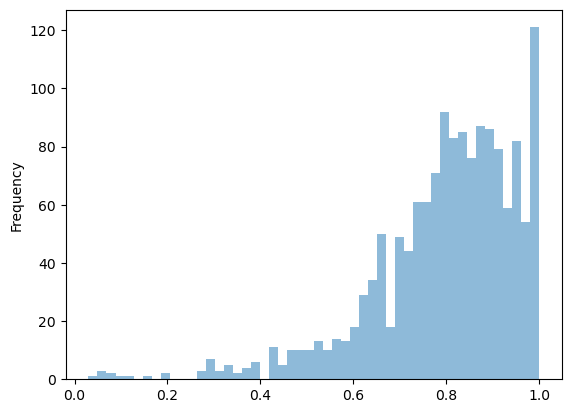

In [12]:
df['Sleep Quality'].plot(kind='hist', bins=50, alpha=0.5)

<Axes: ylabel='Frequency'>

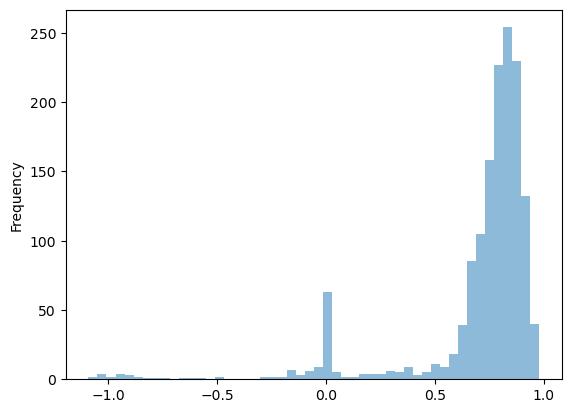

In [13]:
df['Regularity'].plot(kind='hist', bins=50, alpha=0.5)

In [14]:
type(df['Awake (seconds)'].astype(int) / 60)

pandas.core.series.Series

<Axes: ylabel='Frequency'>

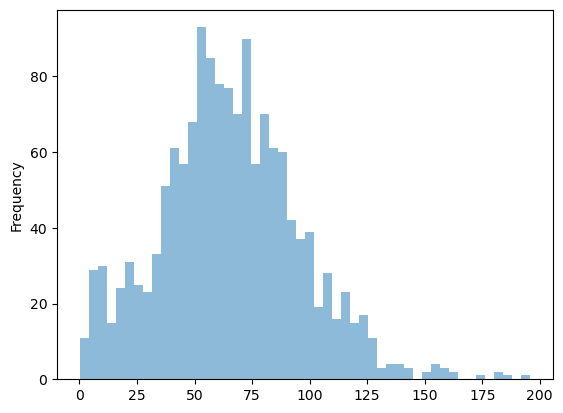

In [15]:
(df['Awake (seconds)'].astype(int) / 60).plot(kind='hist', bins=50, alpha=0.5)

In [16]:
# Dream columns seems to be mostly empty so I will remove it. 
(df['Dream (seconds)'] == 0.0).sum()

np.int64(1445)

In [17]:
# Removing dream variable
df.drop("Dream (seconds)", axis=1, inplace=True)

In [18]:
df.head()

,Start,End,Sleep Quality,Regularity,Awake (seconds),Light (seconds),Deep (seconds),Mood,Heart rate (bpm),Steps,...,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Snore time (seconds),Weather temperature (°F),Weather type,Notes
0,2015-10-08 02:45:57,2015-10-08 10:23:59,0.70,0.00,5404.8,22077.4,0.0,NaN,0,15495,...,51.3,27482.2,22077.4,1465.7,2015-10-08 10:15:00,2015-10-08 10:45:00,0.0,32.0,No weather,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,0.61,0.79,2011.4,22125.7,0.0,NaN,0,13631,...,120.9,24137.1,22125.7,482.7,2015-10-09 11:00:00,2015-10-09 11:30:00,0.0,32.0,No weather,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,0.77,0.00,5304.1,21666.0,0.0,NaN,0,13016,...,85.1,26970.1,21666.0,539.4,2015-10-16 12:00:00,2015-10-16 12:30:00,0.0,32.0,No weather,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,0.84,0.94,1753.7,25935.9,0.0,NaN,0,10987,...,69.0,27689.6,25935.9,553.8,2015-10-17 12:00:00,2015-10-17 12:30:00,0.0,32.0,No weather,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,0.77,0.94,1324.9,23517.4,0.0,NaN,0,9051,...,60.1,24842.4,23517.4,496.8,2015-10-18 12:00:00,2015-10-18 12:30:00,0.0,32.0,No weather,NaN


In [19]:
# Deep column is empty too. I will remove it as well
(df['Deep (seconds)'] == 0.0).sum()

np.int64(1445)

In [20]:
# Removing Deep column
df.drop("Deep (seconds)", axis=1, inplace=True)

In [21]:
df.head()

,Start,End,Sleep Quality,Regularity,Awake (seconds),Light (seconds),Mood,Heart rate (bpm),Steps,Alarm mode,...,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Snore time (seconds),Weather temperature (°F),Weather type,Notes
0,2015-10-08 02:45:57,2015-10-08 10:23:59,0.70,0.00,5404.8,22077.4,NaN,0,15495,Normal,...,51.3,27482.2,22077.4,1465.7,2015-10-08 10:15:00,2015-10-08 10:45:00,0.0,32.0,No weather,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,0.61,0.79,2011.4,22125.7,NaN,0,13631,Normal,...,120.9,24137.1,22125.7,482.7,2015-10-09 11:00:00,2015-10-09 11:30:00,0.0,32.0,No weather,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,0.77,0.00,5304.1,21666.0,NaN,0,13016,Normal,...,85.1,26970.1,21666.0,539.4,2015-10-16 12:00:00,2015-10-16 12:30:00,0.0,32.0,No weather,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,0.84,0.94,1753.7,25935.9,NaN,0,10987,Normal,...,69.0,27689.6,25935.9,553.8,2015-10-17 12:00:00,2015-10-17 12:30:00,0.0,32.0,No weather,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,0.77,0.94,1324.9,23517.4,NaN,0,9051,Normal,...,60.1,24842.4,23517.4,496.8,2015-10-18 12:00:00,2015-10-18 12:30:00,0.0,32.0,No weather,NaN


<Axes: ylabel='Frequency'>

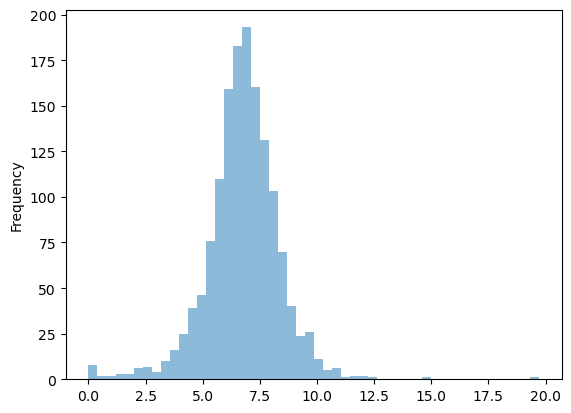

In [22]:
(df['Light (seconds)'].astype(int) / 3600).plot(kind='hist', bins=50, alpha=0.5)

In [23]:
# Light counts how light the sleep was and it is not an accurate count so I will remove it. 
df.drop("Light (seconds)", axis=1, inplace=True)

In [24]:
df.head()

,Start,End,Sleep Quality,Regularity,Awake (seconds),Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),...,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Snore time (seconds),Weather temperature (°F),Weather type,Notes
0,2015-10-08 02:45:57,2015-10-08 10:23:59,0.70,0.00,5404.8,NaN,0,15495,Normal,0.0,...,51.3,27482.2,22077.4,1465.7,2015-10-08 10:15:00,2015-10-08 10:45:00,0.0,32.0,No weather,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,0.61,0.79,2011.4,NaN,0,13631,Normal,0.0,...,120.9,24137.1,22125.7,482.7,2015-10-09 11:00:00,2015-10-09 11:30:00,0.0,32.0,No weather,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,0.77,0.00,5304.1,NaN,0,13016,Normal,0.0,...,85.1,26970.1,21666.0,539.4,2015-10-16 12:00:00,2015-10-16 12:30:00,0.0,32.0,No weather,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,0.84,0.94,1753.7,NaN,0,10987,Normal,0.0,...,69.0,27689.6,25935.9,553.8,2015-10-17 12:00:00,2015-10-17 12:30:00,0.0,32.0,No weather,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,0.77,0.94,1324.9,NaN,0,9051,Normal,0.0,...,60.1,24842.4,23517.4,496.8,2015-10-18 12:00:00,2015-10-18 12:30:00,0.0,32.0,No weather,NaN


In [25]:
# Heart rate variables lacks data too and it is not an accurate measurement.
(df['Heart rate (bpm)'] == 0).sum()

np.int64(1129)

In [26]:
df.drop('Heart rate (bpm)', axis=1, inplace=True)

In [27]:
df.head()

,Start,End,Sleep Quality,Regularity,Awake (seconds),Mood,Steps,Alarm mode,Air Pressure (Pa),City,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Snore time (seconds),Weather temperature (°F),Weather type,Notes
0,2015-10-08 02:45:57,2015-10-08 10:23:59,0.70,0.00,5404.8,NaN,15495,Normal,0.0,NaN,51.3,27482.2,22077.4,1465.7,2015-10-08 10:15:00,2015-10-08 10:45:00,0.0,32.0,No weather,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,0.61,0.79,2011.4,NaN,13631,Normal,0.0,NaN,120.9,24137.1,22125.7,482.7,2015-10-09 11:00:00,2015-10-09 11:30:00,0.0,32.0,No weather,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,0.77,0.00,5304.1,NaN,13016,Normal,0.0,NaN,85.1,26970.1,21666.0,539.4,2015-10-16 12:00:00,2015-10-16 12:30:00,0.0,32.0,No weather,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,0.84,0.94,1753.7,NaN,10987,Normal,0.0,NaN,69.0,27689.6,25935.9,553.8,2015-10-17 12:00:00,2015-10-17 12:30:00,0.0,32.0,No weather,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,0.77,0.94,1324.9,NaN,9051,Normal,0.0,NaN,60.1,24842.4,23517.4,496.8,2015-10-18 12:00:00,2015-10-18 12:30:00,0.0,32.0,No weather,NaN


In [28]:
# Even though Mood is mostly empty there are still some notes that can be usefull. I will keep it.
df['Mood'].value_counts()

Mood
OK      282
Good    242
Bad      19
Name: count, dtype: int64

In [29]:
df['Mood'].isna().sum()

np.int64(933)

In [30]:
# Alarm was rarely used on this app so I will remove it as it doesn't say much
df['Alarm mode'].value_counts()

Alarm mode
No alarm    1301
Normal       175
Name: count, dtype: int64

In [31]:
df.drop('Alarm mode', axis=1, inplace=True)

In [32]:
df.head()

,Start,End,Sleep Quality,Regularity,Awake (seconds),Mood,Steps,Air Pressure (Pa),City,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Snore time (seconds),Weather temperature (°F),Weather type,Notes
0,2015-10-08 02:45:57,2015-10-08 10:23:59,0.70,0.00,5404.8,NaN,15495,0.0,NaN,51.3,27482.2,22077.4,1465.7,2015-10-08 10:15:00,2015-10-08 10:45:00,0.0,32.0,No weather,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,0.61,0.79,2011.4,NaN,13631,0.0,NaN,120.9,24137.1,22125.7,482.7,2015-10-09 11:00:00,2015-10-09 11:30:00,0.0,32.0,No weather,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,0.77,0.00,5304.1,NaN,13016,0.0,NaN,85.1,26970.1,21666.0,539.4,2015-10-16 12:00:00,2015-10-16 12:30:00,0.0,32.0,No weather,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,0.84,0.94,1753.7,NaN,10987,0.0,NaN,69.0,27689.6,25935.9,553.8,2015-10-17 12:00:00,2015-10-17 12:30:00,0.0,32.0,No weather,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,0.77,0.94,1324.9,NaN,9051,0.0,NaN,60.1,24842.4,23517.4,496.8,2015-10-18 12:00:00,2015-10-18 12:30:00,0.0,32.0,No weather,NaN


In [33]:
(df['Air Pressure (Pa)'] == 0).sum()

np.int64(147)

In [34]:
df['Air Pressure (Pa)'].describe()

count    1476.000000
mean       90.716734
std        30.195600
min         0.000000
25%        99.800000
50%       100.600000
75%       101.300000
max       104.000000
Name: Air Pressure (Pa), dtype: float64

<Axes: ylabel='Frequency'>

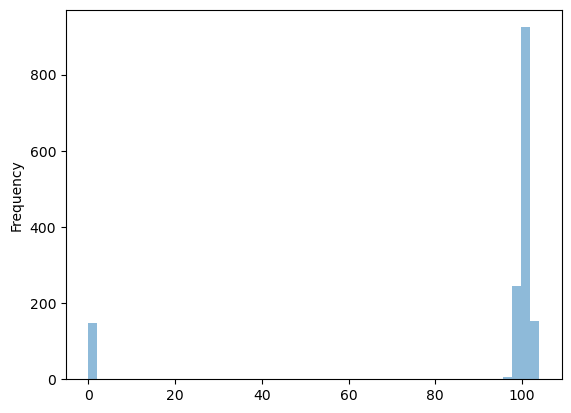

In [35]:
df['Air Pressure (Pa)'].plot(kind='hist', bins=50, alpha=0.5)

Air pressure seems to heavily skewed. I will have to adjust it.

In [36]:
df['Steps'].describe()

count     1476.000000
mean      6903.745935
std       5379.160436
min          0.000000
25%       3136.500000
50%       5742.500000
75%       9445.250000
max      42961.000000
Name: Steps, dtype: float64

In [37]:
(df['Steps'] == 0).sum()

np.int64(40)

<Axes: ylabel='Frequency'>

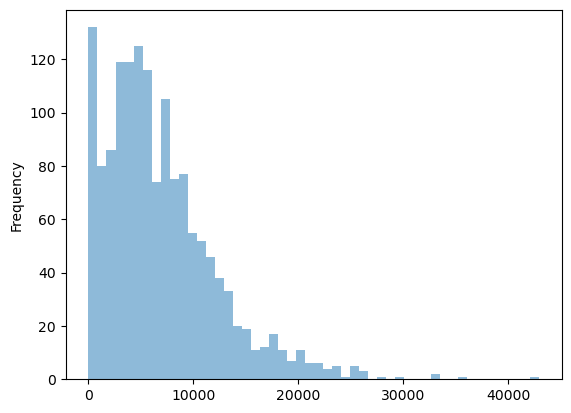

In [38]:
df['Steps'].plot(kind='hist', bins=50, alpha=0.5)

In [39]:
df['City'].value_counts()

City
New York         523
Ajax             346
Toronto          176
Dorval             2
Newburgh town      1
Tweed              1
Lakeshore          1
Name: count, dtype: int64

In [40]:
df['City'].isna().sum()

np.int64(426)

In [41]:
df.head()

,Start,End,Sleep Quality,Regularity,Awake (seconds),Mood,Steps,Air Pressure (Pa),City,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Snore time (seconds),Weather temperature (°F),Weather type,Notes
0,2015-10-08 02:45:57,2015-10-08 10:23:59,0.70,0.00,5404.8,NaN,15495,0.0,NaN,51.3,27482.2,22077.4,1465.7,2015-10-08 10:15:00,2015-10-08 10:45:00,0.0,32.0,No weather,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,0.61,0.79,2011.4,NaN,13631,0.0,NaN,120.9,24137.1,22125.7,482.7,2015-10-09 11:00:00,2015-10-09 11:30:00,0.0,32.0,No weather,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,0.77,0.00,5304.1,NaN,13016,0.0,NaN,85.1,26970.1,21666.0,539.4,2015-10-16 12:00:00,2015-10-16 12:30:00,0.0,32.0,No weather,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,0.84,0.94,1753.7,NaN,10987,0.0,NaN,69.0,27689.6,25935.9,553.8,2015-10-17 12:00:00,2015-10-17 12:30:00,0.0,32.0,No weather,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,0.77,0.94,1324.9,NaN,9051,0.0,NaN,60.1,24842.4,23517.4,496.8,2015-10-18 12:00:00,2015-10-18 12:30:00,0.0,32.0,No weather,NaN


In [42]:
df['Movements per hour'].describe()

count    1476.000000
mean      100.728997
std        59.967878
min         0.000000
25%        67.875000
50%        91.650000
75%       123.325000
max       939.100000
Name: Movements per hour, dtype: float64

<Axes: ylabel='Frequency'>

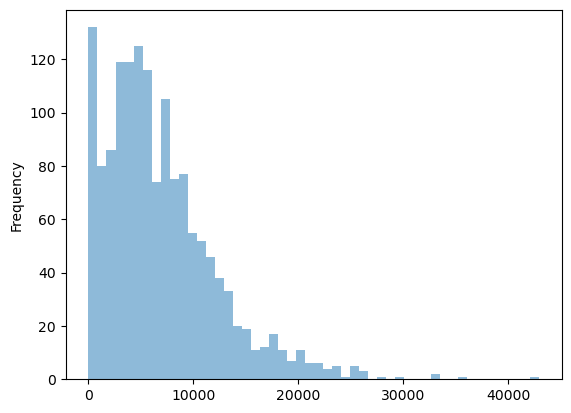

In [43]:
df['Steps'].plot(kind='hist', bins=50, alpha=0.5)

In [44]:
(df['Time in bed (seconds)'] / 3600).describe()

count    1476.000000
mean        7.863124
std         1.674689
min         0.263167
25%         7.057486
50%         7.983639
75%         8.822604
max        20.133639
Name: Time in bed (seconds), dtype: float64

<Axes: ylabel='Frequency'>

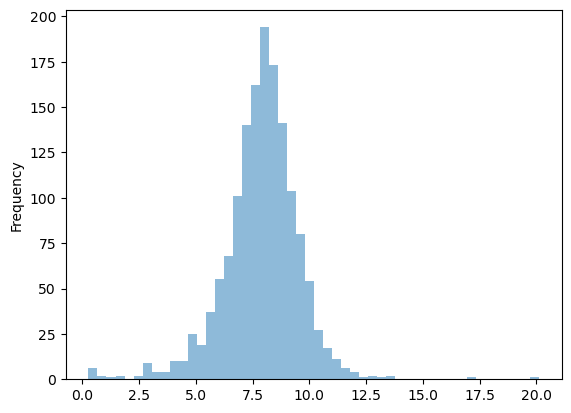

In [45]:
(df['Time in bed (seconds)'] / 3600).plot(kind='hist', bins=50, alpha=0.5)

In [46]:
(df['Time asleep (seconds)'] / 3600).describe()

count    1476.000000
mean        6.760561
std         1.611555
min         0.000000
25%         5.975465
50%         6.795903
75%         7.657792
max        19.730944
Name: Time asleep (seconds), dtype: float64

<Axes: ylabel='Frequency'>

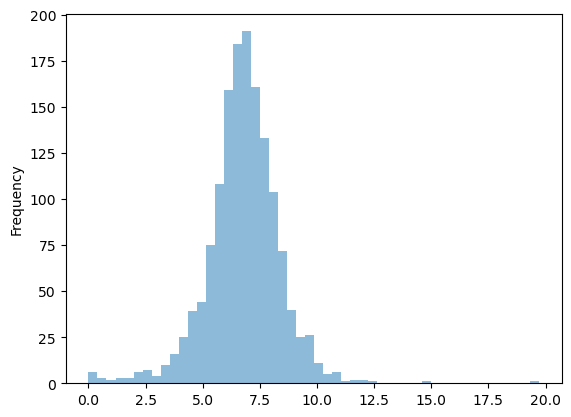

In [47]:
(df['Time asleep (seconds)'] / 3600).plot(kind='hist', bins=50, alpha=0.5)

In [48]:
(df['Time before sleep (seconds)'] / 3600).describe()

count    1476.000000
mean        0.307115
std         0.311382
min         0.000000
25%         0.150139
50%         0.173347
75%         0.311417
max         2.055833
Name: Time before sleep (seconds), dtype: float64

<Axes: ylabel='Frequency'>

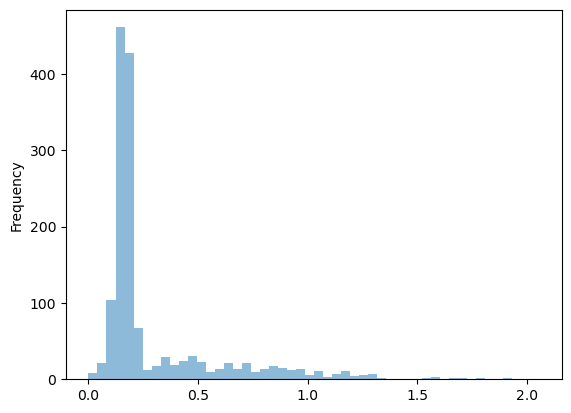

In [49]:
(df['Time before sleep (seconds)'] / 3600).plot(kind='hist', bins=50, alpha=0.5)

In [50]:
# I will remove both window variables as they are predefined
df.drop(['Window start', 'Window stop'], axis=1, inplace=True)

In [51]:
df.head()

,Start,End,Sleep Quality,Regularity,Awake (seconds),Mood,Steps,Air Pressure (Pa),City,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Snore time (seconds),Weather temperature (°F),Weather type,Notes
0,2015-10-08 02:45:57,2015-10-08 10:23:59,0.70,0.00,5404.8,NaN,15495,0.0,NaN,51.3,27482.2,22077.4,1465.7,0.0,32.0,No weather,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,0.61,0.79,2011.4,NaN,13631,0.0,NaN,120.9,24137.1,22125.7,482.7,0.0,32.0,No weather,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,0.77,0.00,5304.1,NaN,13016,0.0,NaN,85.1,26970.1,21666.0,539.4,0.0,32.0,No weather,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,0.84,0.94,1753.7,NaN,10987,0.0,NaN,69.0,27689.6,25935.9,553.8,0.0,32.0,No weather,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,0.77,0.94,1324.9,NaN,9051,0.0,NaN,60.1,24842.4,23517.4,496.8,0.0,32.0,No weather,NaN


In [52]:
df['Snore time (seconds)'].describe()

count     1476.000000
mean      1900.407656
std       2254.184198
min          0.000000
25%          0.000000
50%       1064.450000
75%       3387.975000
max      11036.300000
Name: Snore time (seconds), dtype: float64

In [53]:
percentage = (df['Snore time (seconds)'] == 0.0).mean() * 100
print(f"{percentage:.2f}% of the column has 0.0 values")

40.04% of the column has 0.0 values


40% of table doesn't have data for Snore. This feature was introduced later hence the missing data. 

In [54]:
df['Weather temperature (°F)'].describe()

count    1476.000000
mean       38.605488
std        12.654207
min         3.900000
25%        32.000000
50%        32.000000
75%        42.325000
max        88.500000
Name: Weather temperature (°F), dtype: float64

<Axes: ylabel='Frequency'>

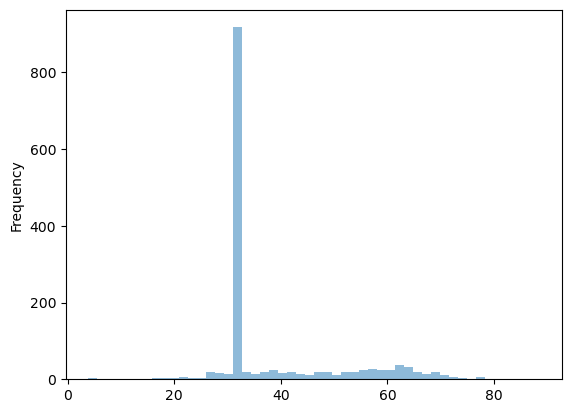

In [55]:
df['Weather temperature (°F)'].plot(kind='hist', bins=50, alpha=0.5)

In [56]:
value_counts = df['Weather temperature (°F)'].value_counts()
most_common = value_counts.idxmax()
count = value_counts.max()

print(f"Most common value: {most_common}, appears {count} times")

Most common value: 32.0, appears 902 times


I am not sure how accurate this weather record is. I believe 32 has been entered as default a lot.

In [57]:
df.head()

,Start,End,Sleep Quality,Regularity,Awake (seconds),Mood,Steps,Air Pressure (Pa),City,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Snore time (seconds),Weather temperature (°F),Weather type,Notes
0,2015-10-08 02:45:57,2015-10-08 10:23:59,0.70,0.00,5404.8,NaN,15495,0.0,NaN,51.3,27482.2,22077.4,1465.7,0.0,32.0,No weather,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,0.61,0.79,2011.4,NaN,13631,0.0,NaN,120.9,24137.1,22125.7,482.7,0.0,32.0,No weather,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,0.77,0.00,5304.1,NaN,13016,0.0,NaN,85.1,26970.1,21666.0,539.4,0.0,32.0,No weather,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,0.84,0.94,1753.7,NaN,10987,0.0,NaN,69.0,27689.6,25935.9,553.8,0.0,32.0,No weather,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,0.77,0.94,1324.9,NaN,9051,0.0,NaN,60.1,24842.4,23517.4,496.8,0.0,32.0,No weather,NaN


In [58]:
df['Weather type'].value_counts()

Weather type
No weather       900
Sunny            185
Cloudy           149
Partly cloudy    126
Fair              53
Rain              48
Snow               6
Fog                6
Rainy showers      3
Name: count, dtype: int64

This column indicates that there are no weather for 900 rows. This could be correlated with the weather temperature column. I will keep them

In [59]:
df['Notes'].value_counts()

Notes
Worked out                                                111
Worked                                                    101
Drank Alcohol :Worked                                      37
Drank Alcohol                                              26
School:Worked out                                          22
Stressful day                                              12
School                                                      8
Drank Alcohol :Worked out                                   8
Ate late                                                    7
Ate late:Drank Alcohol :Worked                              4
Ate late:Worked out                                         4
Worked:Worked out                                           4
Ate late:Drank Alcohol                                      3
Drank Alcohol :Worked:Worked out                            2
Drank Alcohol :School                                       2
Drank Alcohol :School:Worked out                            2
At

In [60]:
df.head()

,Start,End,Sleep Quality,Regularity,Awake (seconds),Mood,Steps,Air Pressure (Pa),City,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Snore time (seconds),Weather temperature (°F),Weather type,Notes
0,2015-10-08 02:45:57,2015-10-08 10:23:59,0.70,0.00,5404.8,NaN,15495,0.0,NaN,51.3,27482.2,22077.4,1465.7,0.0,32.0,No weather,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,0.61,0.79,2011.4,NaN,13631,0.0,NaN,120.9,24137.1,22125.7,482.7,0.0,32.0,No weather,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,0.77,0.00,5304.1,NaN,13016,0.0,NaN,85.1,26970.1,21666.0,539.4,0.0,32.0,No weather,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,0.84,0.94,1753.7,NaN,10987,0.0,NaN,69.0,27689.6,25935.9,553.8,0.0,32.0,No weather,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,0.77,0.94,1324.9,NaN,9051,0.0,NaN,60.1,24842.4,23517.4,496.8,0.0,32.0,No weather,NaN


In [61]:
df.columns

Index(['Start', 'End', 'Sleep Quality', 'Regularity', 'Awake (seconds)',
       'Mood', 'Steps', 'Air Pressure (Pa)', 'City', 'Movements per hour',
       'Time in bed (seconds)', 'Time asleep (seconds)',
       'Time before sleep (seconds)', 'Snore time (seconds)',
       'Weather temperature (°F)', 'Weather type', 'Notes'],
      dtype='object')